In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string


from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score

In [ ]:
fake_data = pd.read_csv('Fake.csv')

true_data = pd.read_csv('True.csv')

fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Creating a target label for both dataset

In [ ]:
fake_data['target'] = 0
true_data['target'] = 1

In [ ]:
fake_data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


#### Combining both dataset

In [ ]:
news = pd.concat([true_data,fake_data], axis=0)

In [ ]:
news

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
news['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

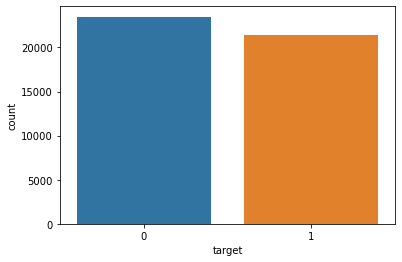

In [ ]:
sns.countplot(data=news, x='target')

<AxesSubplot:>

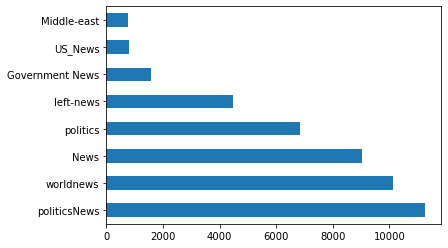

In [ ]:
news['subject'].value_counts().plot(kind='barh')

In [ ]:
news['date']

0        December 31, 2017 
1        December 29, 2017 
2        December 31, 2017 
3        December 30, 2017 
4        December 29, 2017 
                ...        
23476      January 16, 2016
23477      January 16, 2016
23478      January 15, 2016
23479      January 14, 2016
23480      January 12, 2016
Name: date, Length: 44898, dtype: object

#### Create a new column called content that combines the news.title  and news.text together

In [ ]:
news['content']= news['title'] + " " + news['text']

In [ ]:
news.head()

,title,text,subject,date,target,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


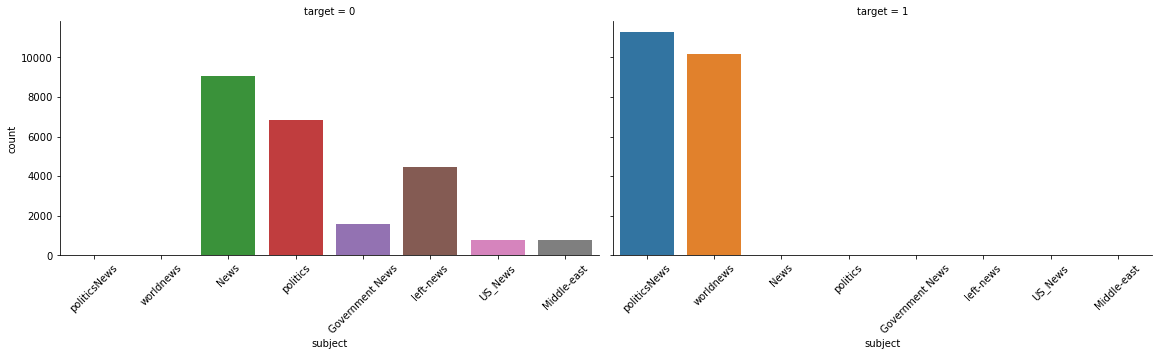

In [ ]:

g = sns.catplot(x="subject", col="target",
                data=news, kind="count",
                height=4, aspect=2)

g.set_xticklabels(rotation=45)


* Fake news are all over the category except politics and world news
* True news are present only in politics and world news and the count is high


#### Cleaning the date column

In [ ]:
news=news[~news.date.str.contains("http")]
news=news[~news.date.str.contains("HOST")]

In [ ]:
news['date']= pd.to_datetime(news['date'])

In [ ]:
news.head()

,title,text,subject,date,target,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1,Trump wants Postal Service to charge 'much mor...


### Deleting unnecessary columns after combination

In [ ]:
del news['title']
del news['text']

In [ ]:
news.head()

,subject,date,target,content
0,politicsNews,2017-12-31,1,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,2017-12-29,1,U.S. military to accept transgender recruits o...
2,politicsNews,2017-12-31,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,2017-12-30,1,FBI Russia probe helped by Australian diplomat...
4,politicsNews,2017-12-29,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
# Rearranging the data in the dataset

news= news[['date', 'subject','content', 'target']]

In [ ]:
news.head()

,date,subject,content,target
0,2017-12-31,politicsNews,"As U.S. budget fight looms, Republicans flip t...",1
1,2017-12-29,politicsNews,U.S. military to accept transgender recruits o...,1
2,2017-12-31,politicsNews,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,2017-12-30,politicsNews,FBI Russia probe helped by Australian diplomat...,1
4,2017-12-29,politicsNews,Trump wants Postal Service to charge 'much mor...,1


#### Checking for missing value

In [ ]:
news.isnull().sum()

date       0
subject    0
content    0
target     0
dtype: int64

<AxesSubplot:xlabel='date'>

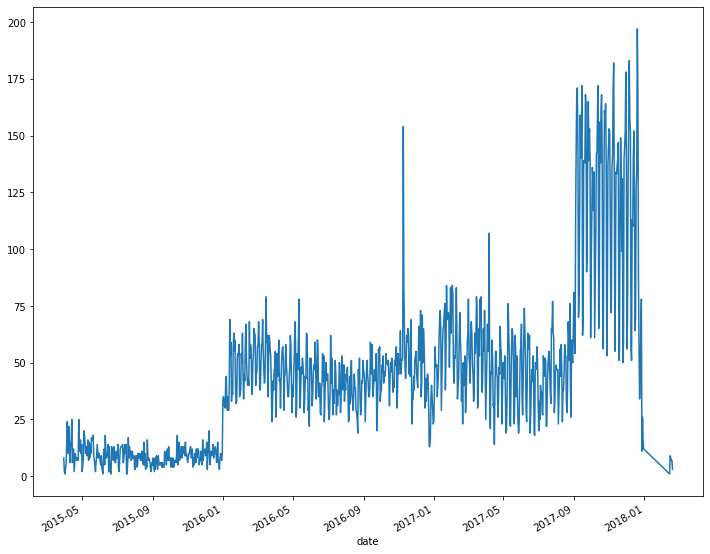

In [ ]:
plt.figure(figsize=(12,10))
news.groupby(['date'])['target'].count().plot(kind='line')

<AxesSubplot:xlabel='date', ylabel='target'>

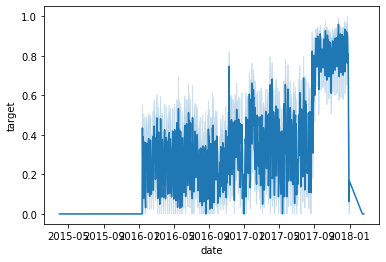

In [ ]:
plt.figure(figsize=(12,10))
sns.lineplot(x=news.date, y= news.target)

### WordCloud of Fake and True News


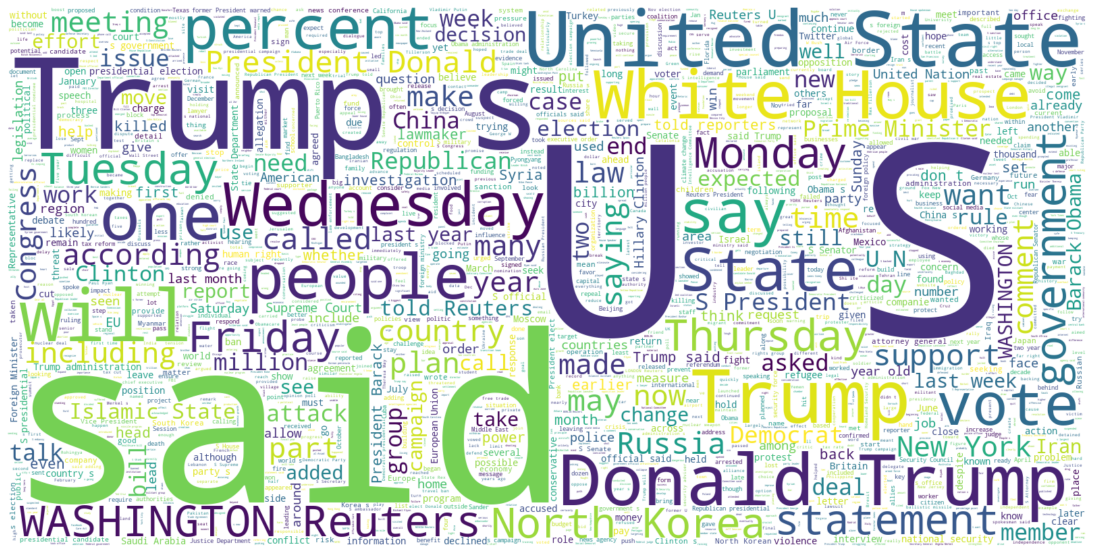

In [ ]:
#Word cloud for real news
cloud = WordCloud(max_words = 1800,
                  width = 1600,
                  height = 800,
                  stopwords = STOPWORDS,
                  background_color = "white").generate(" ".join(news[news['target'] == 1].content))
plt.figure(figsize=(15, 9))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

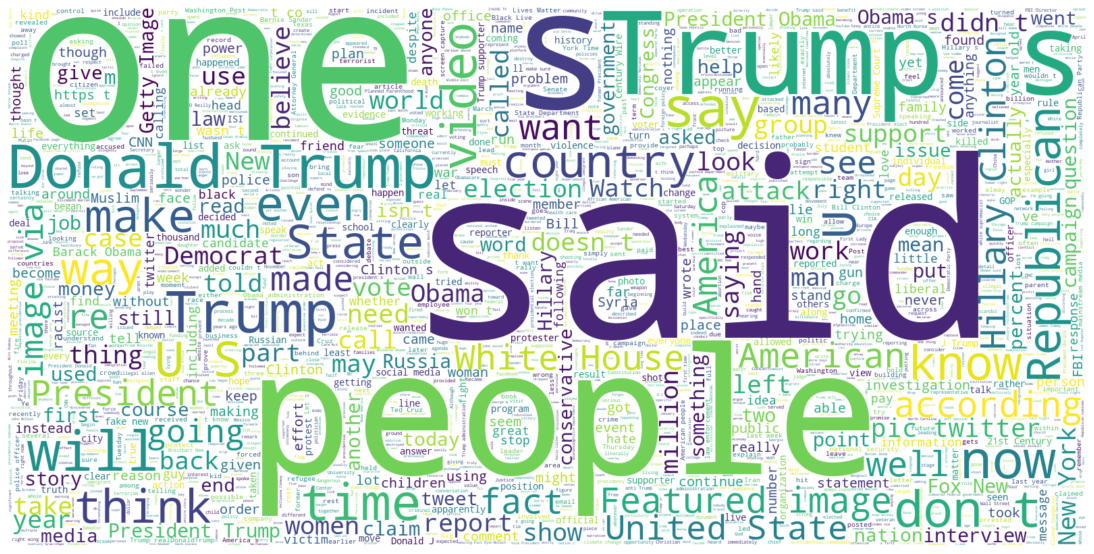

In [ ]:
#Word cloud for fake news
cloud = WordCloud(max_words = 1800,
                  width = 1600,
                  height = 800,
                  stopwords = STOPWORDS,
                  background_color = "white").generate(" ".join(news[news['target'] == 0].content))
plt.figure(figsize=(15, 9))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Classification of article and target

In [ ]:
X = news['content']

y = news['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:


t_vector = TfidfVectorizer(stop_words = 'english')

In [ ]:
t_vector.fit(X_train)

TfidfVectorizer(stop_words='english')

In [ ]:
train_results = t_vector.transform(X_train)

test_results = t_vector.transform(X_test)

## Naive bayes model (Multinomial)

In [ ]:
multi_nomial = MultinomialNB()
multi_nomial.fit(train_results,y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6977
           1       0.94      0.92      0.93      6490

    accuracy                           0.94     13467
   macro avg       0.94      0.93      0.94     13467
weighted avg       0.94      0.94      0.94     13467



C:\Users\Pce\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


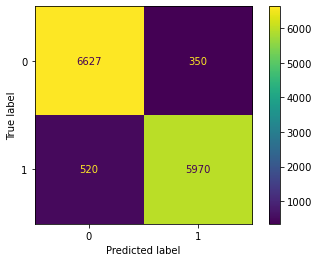

In [ ]:
pred = multi_nomial.predict(test_results)
print(classification_report(y_test,pred))
plot_confusion_matrix(multi_nomial,test_results, y_test)


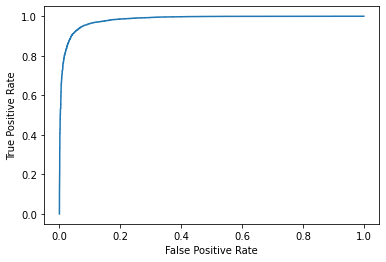

Train accuracy  0.9455777982877693
Test accuracy  0.9353976386723101
Test recall 0.9198767334360555
Test AUC 0.9348559530731947
Test f1 score 0.9320843091334895
Test precision score 0.944620253164557


In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = multi_nomial.score(train_results, y_train)
test_score = multi_nomial.score(test_results, y_test)
y_pred_nb = multi_nomial.predict(test_results)

test_recall = recall_score(y_test, y_pred_nb)
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred_nb)
test_auc = auc(nb_fpr, nb_tpr)
test_f1_score = f1_score(y_test,y_pred_nb)
test_precision_score = precision_score(y_test,y_pred_nb)

#implement AUC Curve
y_pred_proba = multi_nomial.predict_proba(test_results)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

## RandomForest Model

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=101)

rfc.fit(train_results, y_train)


RandomForestClassifier(random_state=101)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6977
           1       0.99      0.99      0.99      6490

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467



C:\Users\Pce\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


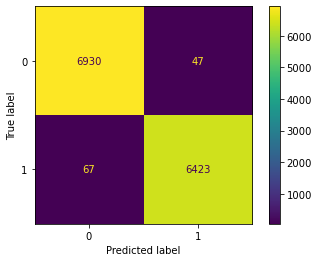

In [ ]:
pred_rf = rfc.predict(test_results)
print(classification_report(y_test,pred_rf))
plot_confusion_matrix(rfc,test_results, y_test)


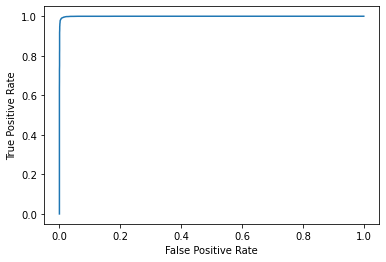

Train accuracy  1.0
Test accuracy  0.9915348629984406
Test recall 0.9896764252696456
Test AUC 0.9914700028025166
Test f1 score 0.9912037037037037
Test precision score 0.9927357032457497


In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = rfc.score(train_results, y_train)
test_score = rfc.score(test_results, y_test)
y_pred_rf = rfc.predict(test_results)

test_recall = recall_score(y_test, y_pred_rf)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_rf)
test_auc = auc(rf_fpr, rf_tpr)
test_f1_score = f1_score(y_test,y_pred_rf)
test_precision_score = precision_score(y_test,y_pred_rf)

#implement AUC Curve
y_pred_proba = rfc.predict_proba(test_results)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

## Xgboost

In [ ]:
xgb = XGBClassifier(random_state=101)
xgb.fit(train_results, y_train)

C:\Users\Pce\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6977
           1       0.99      0.99      0.99      6490

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467



C:\Users\Pce\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


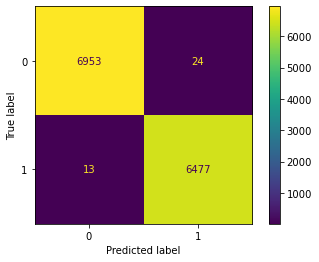

In [ ]:
pred_xgb = rfc.predict(test_results)
print(classification_report(y_test,pred_xgb))
plot_confusion_matrix(xgb,test_results, y_test)


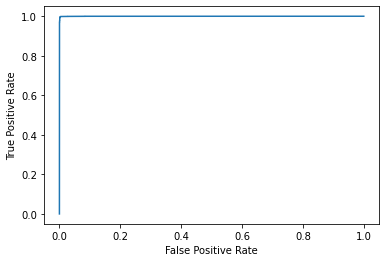

Train accuracy  0.9999681741510454
Test accuracy  0.9972525432538799
Test recall 0.9979969183359014
Test AUC 0.997278522232305
Test f1 score 0.9971518743745671
Test precision score 0.9963082602676512


In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = xgb.score(train_results, y_train)
test_score = xgb.score(test_results, y_test)
y_pred_xgb = xgb.predict(test_results)

test_recall = recall_score(y_test, y_pred_xgb)
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, y_pred_xgb)
test_auc = auc(xgb_fpr, xgb_tpr)
test_f1_score = f1_score(y_test,y_pred_xgb)
test_precision_score = precision_score(y_test,y_pred_xgb)


#implement AUC Curve
y_pred_proba = xgb.predict_proba(test_results)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)

## Hyperparameter Tuning on Randomforest

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

param_grid = {
    'n_estimators': [500, 700, 900],
    'min_samples_split': [2,4,6,8,10]
}

gs = GridSearchCV ( estimator = rfc_clf,
                   param_grid = param_grid,
                   scoring = 'accuracy',
                   cv = 5,
                   refit = True,
                   n_jobs = -1
                   )

gs = gs.fit ( train_results, y_train )

print ( 'Parameter setting that gave the best results on the hold out data:', gs.best_params_ )

print ( 'Mean cross-validated score of the best_estimator: %.3f' %gs.best_score_ )

gs = gs.best_estimator_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
gs.fit (train_results, y_train)
y_pred_rfc_clf = gs.predict (test_results)


In [ ]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = gs.score(train_results, y_train)
test_score = gs.score(test_results, y_test)
y_pred_rfc_clf = gs.predict(test_results)

test_recall = recall_score(y_test, y_pred_rfc_clf)
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, y_pred_rfc_clf)
test_auc = auc(rfc_fpr, rfc_tpr)
test_f1_score = f1_score(y_test,y_pred_rfc_clf)
test_precision_score = precision_score(y_test,y_pred_rfc_clf)

#implement AUC Curve
y_pred_proba = xgb.predict_proba(test_results)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
print("Test f1 score", test_f1_score)
print("Test precision score", test_precision_score)